In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import shap
from tqdm import tqdm
#To remove warnings
import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('processed.csv')

In [4]:
df['RUL'].nunique()

9383

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16916 entries, 0 to 16915
Data columns (total 56 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   workpiece_weight, tonn                                       16916 non-null  float64
 1   steel_type                                                   16916 non-null  int64  
 2   doc_requirement                                              16916 non-null  int64  
 3   cast_in_row                                                  16916 non-null  int64  
 4   steel_weight_theoretical, tonn                               16916 non-null  float64
 5   slag_weight_close_grab1, tonn                                16916 non-null  float64
 6   metal_residue_grab1, tonn                                    16916 non-null  float64
 7   steel_weight, tonn                                           16916 non-null 

In [6]:
df.corr()

,"workpiece_weight, tonn",steel_type,doc_requirement,cast_in_row,"steel_weight_theoretical, tonn","slag_weight_close_grab1, tonn","metal_residue_grab1, tonn","steel_weight, tonn",grab1_num,"steel_temperature_grab1, Celsius deg.",grab2_num,"resistance, tonn","swing_frequency, amount/minute","crystallizer_movement, mm","alloy_speed, meter/minute","water_consumption, liter/minute","water_temperature_delta, Celsius deg.","water_consumption_secondary_cooling_zone_num1, liter/minute","water_consumption_secondary_cooling_zone_num2, liter/minute","water_consumption_secondary_cooling_zone_num3, liter/minute","quantity, tonn",time_temperature_measurement1,"temperature_measurement1, Celsius deg.",time_temperature_measurement2,"temperature_measurement2, Celsius deg.",sample_time_continuous_caster,"Ce, %","C, %","Si, %","Mn,%","S, %","P, %","Cr, %","Ni, %","Cu, %","As, %","Mo, %","Nb, %","Ti, %","V, %","Al, %","Ca, %","N, %","Pb, %","Mg, %","Zn, %",sleeve,num_crystallizer,num_stream,RUL,150x150,180x180,close,open,B 789/BC,SPH-B 795
"workpiece_weight, tonn",1.000000,0.126652,0.100923,0.083493,0.893102,NaN,-2.220960e-01,0.916641,0.013182,-0.071727,-0.003067,-0.008792,-0.097390,0.005795,0.078503,-0.057111,0.034546,-0.008447,0.026068,0.079321,-0.116759,-0.007862,-0.068581,-0.007862,-0.075468,-0.001230,9.901833e-02,0.133115,0.134338,0.098730,-0.052054,0.149468,-0.022337,-0.023354,-0.135470,0.065943,-0.068793,-0.007298,0.055431,0.054441,0.023089,-0.063920,-0.112609,-0.136785,0.006011,0.024354,-0.043421,0.007487,-0.004320,-0.005809,0.065886,-0.065886,-0.032835,0.032835,-0.063640,-0.001659
steel_type,0.126652,1.000000,0.345183,0.132171,0.097850,NaN,1.671154e-03,0.095521,-0.049300,-0.046147,0.002139,-0.038263,-0.199629,0.169294,0.406375,-0.317157,0.489416,0.569081,0.624570,0.507296,-0.011909,0.027177,-0.034057,0.027177,-0.007074,0.024441,-1.499251e-01,0.166188,-0.206439,-0.010970,-0.106024,0.092260,0.066293,-0.015789,-0.049277,-0.066990,-0.018971,-0.069597,-0.183336,0.030771,-0.285929,-0.097698,-0.144629,-0.140990,-0.069403,-0.015401,0.048857,-0.015800,-0.019988,-0.031099,0.328634,-0.328634,-0.401529,0.401529,-0.086847,0.001217
doc_requirement,0.100923,0.345183,1.000000,0.041666,0.093132,NaN,8.646063e-03,0.089583,0.014055,-0.084527,0.011455,-0.036539,0.551276,-0.122293,-0.546277,0.563648,0.327019,-0.185003,-0.346774,-0.494846,-0.028098,0.073210,-0.169130,0.073210,-0.159930,0.077856,2.892290e-01,0.402546,0.185974,0.255615,0.254016,0.160458,0.203956,0.085674,0.133127,-0.042447,0.154101,-0.023658,0.258812,0.160315,0.064138,0.020884,0.238306,0.327954,0.306080,0.332269,0.036909,0.002389,0.002661,-0.047169,-0.587874,0.587874,-0.197424,0.197424,0.118551,0.006294
cast_in_row,0.083493,0.132171,0.041666,1.000000,0.130572,NaN,-8.257262e-03,0.129443,-0.029748,-0.101038,-0.002527,-0.003085,0.098331,0.144622,0.009627,0.017491,0.126782,0.220515,0.132801,0.061103,-0.150282,-0.022814,-0.035247,-0.022814,-0.015152,-0.040762,-2.175680e-01,-0.029174,-0.158468,-0.217550,0.091979,0.059512,-0.057755,0.006396,0.009780,-0.059177,0.015849,-0.118544,-0.120210,-0.129787,-0.027769,-0.014659,0.013448,0.067379,0.063630,0.062642,0.025040,0.032271,0.009273,0.015272,-0.025409,0.025409,-0.121982,0.121982,0.078360,0.018926
"steel_weight_theoretical, tonn",0.893102,0.097850,0.093132,0.130572,1.000000,NaN,-1.382789e-02,0.982029,0.024571,-0.074729,-0.004879,-0.010536,-0.066322,-0.005871,0.064509,-0.046446,0.033058,-0.018346,0.011488,0.064697,-0.112739,-0.006396,-0.074090,-0.006396,-0.086732,0.003165,1.174282e-01,0.131860,0.151705,0.115474,-0.038977,0.160442,-0.009787,-0.029203,-0.120147,0.085027,-0.066843,-0.005325,0.079393,0.070210,0.046700,-0.063205,-0.107056,-0.107617,0.011076,0.028629,-0.031682,0.011464,-0.004686,-0.007723,0.056081,-0.056081,-0.022688,0.022688,-0.063139,-0.002664
"slag_weight_close_grab1, tonn",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
df = df.drop('slag_weight_close_grab1, tonn',axis=1)

In [8]:
df.columns

Index(['workpiece_weight, tonn', 'steel_type', 'doc_requirement',
       'cast_in_row', 'steel_weight_theoretical, tonn',
       'metal_residue_grab1, tonn', 'steel_weight, tonn', 'grab1_num',
       'steel_temperature_grab1, Celsius deg.', 'grab2_num',
       'resistance, tonn', 'swing_frequency, amount/minute',
       'crystallizer_movement, mm', 'alloy_speed, meter/minute',
       'water_consumption, liter/minute',
       'water_temperature_delta, Celsius deg.',
       'water_consumption_secondary_cooling_zone_num1, liter/minute',
       'water_consumption_secondary_cooling_zone_num2, liter/minute',
       'water_consumption_secondary_cooling_zone_num3, liter/minute',
       'quantity, tonn', 'time_temperature_measurement1',
       'temperature_measurement1, Celsius deg.',
       'time_temperature_measurement2',
       'temperature_measurement2, Celsius deg.',
       'sample_time_continuous_caster', 'Ce, %', 'C, %', 'Si, %', 'Mn,%',
       'S, %', 'P, %', 'Cr, %', 'Ni, %', 'Cu, %', 

In [9]:
X = df[['workpiece_weight, tonn', 'steel_type', 'doc_requirement',
       'cast_in_row', 'steel_weight_theoretical, tonn',
       'metal_residue_grab1, tonn', 'steel_weight, tonn', 'grab1_num',
       'steel_temperature_grab1, Celsius deg.', 'grab2_num',
       'resistance, tonn', 'swing_frequency, amount/minute',
       'crystallizer_movement, mm', 'alloy_speed, meter/minute',
       'water_consumption, liter/minute',
       'water_temperature_delta, Celsius deg.',
       'water_consumption_secondary_cooling_zone_num1, liter/minute',
       'water_consumption_secondary_cooling_zone_num2, liter/minute',
       'water_consumption_secondary_cooling_zone_num3, liter/minute',
       'quantity, tonn', 'time_temperature_measurement1',
       'temperature_measurement1, Celsius deg.',
       'time_temperature_measurement2',
       'temperature_measurement2, Celsius deg.',
       'sample_time_continuous_caster', 'Ce, %', 'C, %', 'Si, %', 'Mn,%',
       'S, %', 'P, %', 'Cr, %', 'Ni, %', 'Cu, %', 'As, %', 'Mo, %', 'Nb, %',
       'Ti, %', 'V, %', 'Al, %', 'Ca, %', 'N, %', 'Pb, %', 'Mg, %', 'Zn, %',
       'sleeve', 'num_crystallizer', 'num_stream', '150x150', '180x180',
       'close', 'open', 'B 789/BC', 'SPH-B 795']]
y = df[['RUL']]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [11]:
shap.initjs()

In [12]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

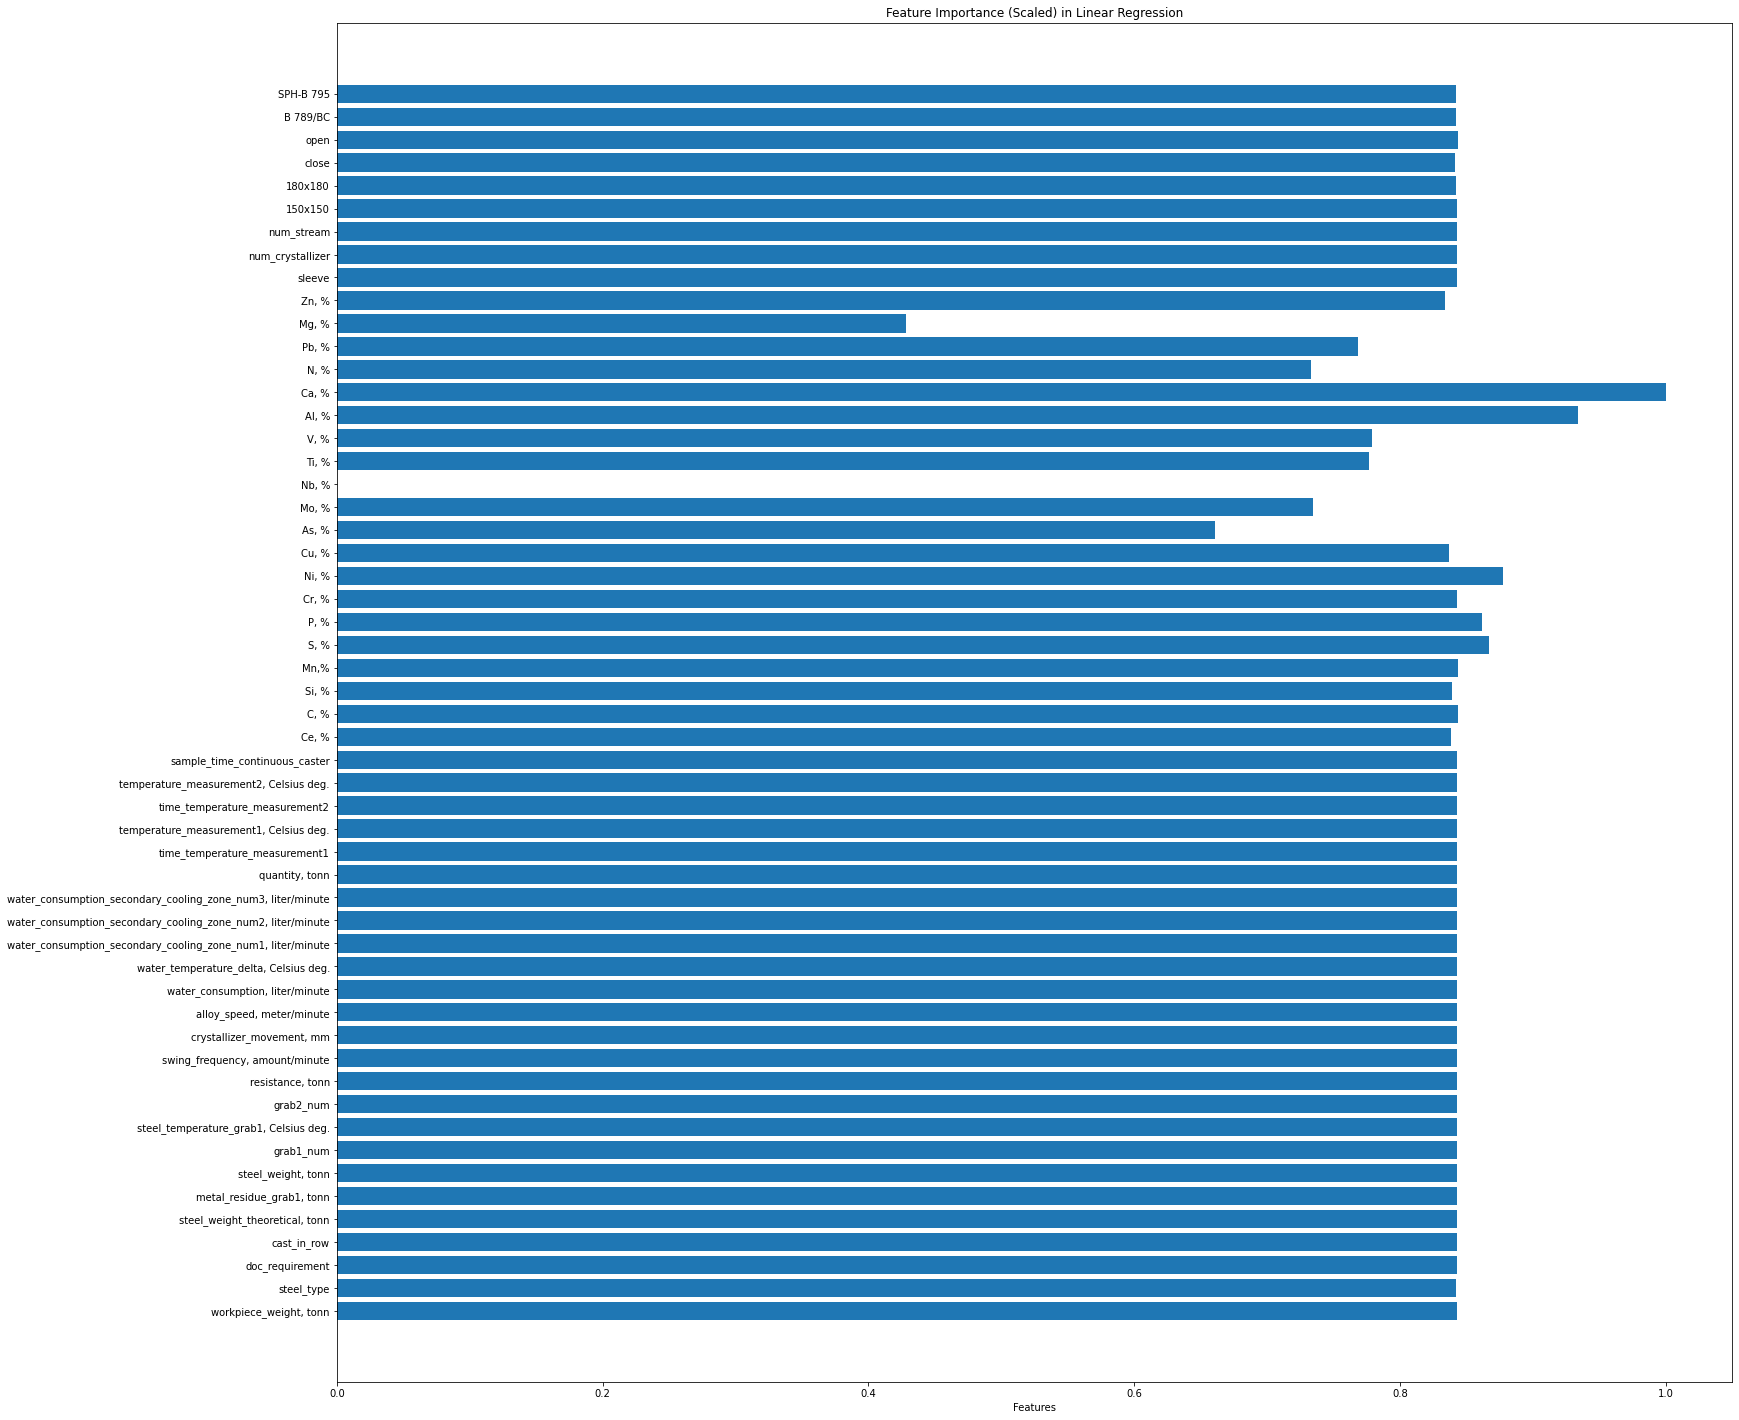

                                              Feature  Scaled Importance
0                              workpiece_weight, tonn           0.842761
1                                          steel_type           0.842357
2                                     doc_requirement           0.842964
3                                         cast_in_row           0.842769
4                      steel_weight_theoretical, tonn           0.842754
5                           metal_residue_grab1, tonn           0.842750
6                                  steel_weight, tonn           0.842772
7                                           grab1_num           0.842752
8               steel_temperature_grab1, Celsius deg.           0.842767
9                                           grab2_num           0.842767
10                                   resistance, tonn           0.842767
11                     swing_frequency, amount/minute           0.842790
12                          crystallizer_movement, 

In [13]:
#For feature importance in linear regression model

#Getting the importance of all the features
feature_importance = linear.coef_

# If feature_importance is 2D, flatten it to 1D
if len(feature_importance.shape) > 1:
    feature_importance = feature_importance.ravel()
    
# Create a DataFrame to store feature names and their importance
feature_names = X.columns.to_list()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Scale the importance values between 0 and 1 using Min-Max scaling
scaler = MinMaxScaler()
importance_df['Scaled Importance'] = scaler.fit_transform(importance_df[['Importance']])

# Create a bar plot
plt.figure(figsize=(25, 25))
plt.barh(importance_df['Feature'], importance_df['Scaled Importance'])
plt.xlabel('Scaled Importance (0 to 1)')
plt.xlabel('Features')
plt.title('Feature Importance (Scaled) in Linear Regression')
plt.show()

#For writing labels in slanting
# plt.xticks(rotation=45)
print(pd.merge(importance_df['Feature'],importance_df['Scaled Importance'],left_index=True,right_index=True))

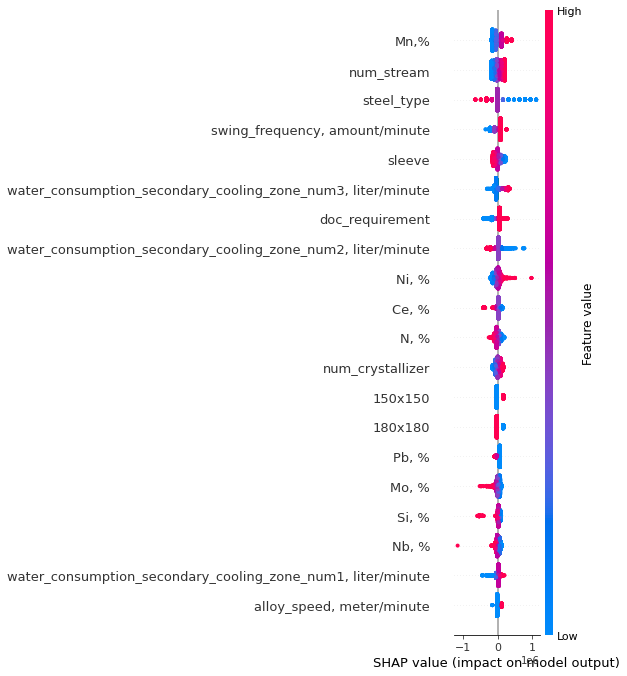

In [14]:
shap_explainer = shap.Explainer(linear,X_train)
shap_values = shap_explainer(X_test)
shap.summary_plot(shap_values)

In [15]:
linear.score(X_test,y_test)

0.039159051853501436

#### Cross Validation Score, to check for overfitting, and get a generalized accuracy

In [16]:
score_lr=cross_val_score(LinearRegression(),X_test,y_test,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.01782997 0.03272147 0.03250392]
Avg : 0.027685119442302415


In [17]:
decision = DecisionTreeRegressor()
decision.fit(X_train,y_train)

DecisionTreeRegressor()

In [18]:
decision.score(X_test,y_test)

0.9698340863551203

In [19]:
#Cross Validation Score, to check for overfitting, and get a generalized accuracy
score_dt=cross_val_score(DecisionTreeRegressor(),X_test,y_test,cv=3)
print(score_dt)
print("Avg :",np.average(score_dt))

[0.87203762 0.91449139 0.91446305]
Avg : 0.9003306872051677


In [20]:
# for i in tqdm(range(0, 100)):
#     shap_explainer = shap.TreeExplainer(decision)
#     shap_values = shap_explainer.shap_values(X)
#     shap.summary_plot(shap_values)

                                                               0
SPH-B 795                                           0.000000e+00
metal_residue_grab1, tonn                           0.000000e+00
close                                               4.080797e-14
open                                                4.202169e-14
steel_weight, tonn                                  2.185295e-11
workpiece_weight, tonn                              2.649579e-11
grab1_num                                           4.949239e-11
water_temperature_delta, Celsius deg.               5.302064e-11
steel_weight_theoretical, tonn                      8.037227e-11
quantity, tonn                                      1.540624e-10
water_consumption, liter/minute                     1.635514e-10
B 789/BC                                            2.397171e-10
Mg, %                                               2.937050e-10
steel_temperature_grab1, Celsius deg.               4.629916e-10
water_consumption_seconda

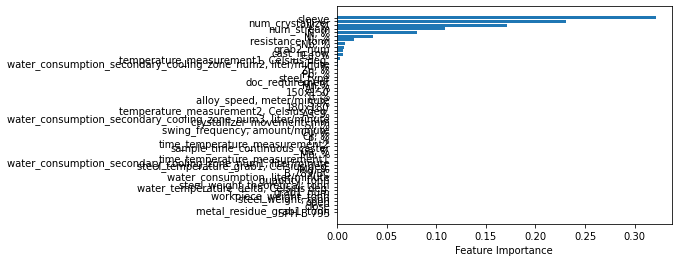

In [21]:
sort = decision.feature_importances_.argsort()
plt.barh(X.columns[sort], decision.feature_importances_[sort])
plt.xlabel("Feature Importance")
print(pd.DataFrame(decision.feature_importances_[sort],X.columns[sort]))

In [22]:
random = RandomForestRegressor()
random.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
random.score(X_test,y_test)

0.9947372495621623

In [24]:
#Cross Validation Score, to check for overfitting, and get a generalized accuracy
score_rf=cross_val_score(RandomForestRegressor(),X_test,y_test,cv=3)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.98049008 0.97677569 0.96828255]
Avg : 0.9751827734970991


In [25]:
# for i in tqdm(range(0, 100)):
#     shap_explainer = shap.TreeExplainer(random)
#     shap_values = shap_explainer.shap_values(X)
#     shap.summary_plot(shap_values, X)

                                                               0
SPH-B 795                                           1.141089e-15
metal_residue_grab1, tonn                           2.724550e-13
close                                               8.096398e-11
open                                                2.143717e-10
grab1_num                                           6.533512e-10
water_temperature_delta, Celsius deg.               9.620191e-10
alloy_speed, meter/minute                           1.863985e-09
doc_requirement                                     1.882559e-09
B 789/BC                                            2.637122e-05
quantity, tonn                                      3.514197e-05
water_consumption, liter/minute                     6.904078e-05
time_temperature_measurement2                       1.456694e-04
150x150                                             1.702193e-04
Mg, %                                               2.014742e-04
180x180                  

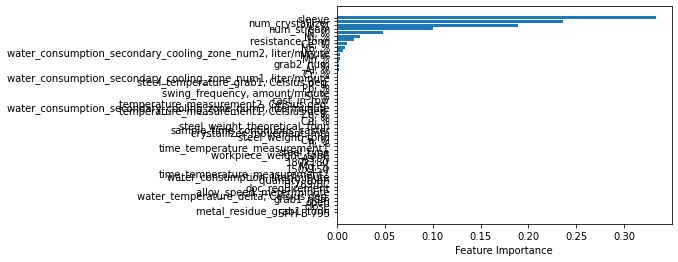

<Figure size 1440x1440 with 0 Axes>

In [26]:
#Feature importance in order to analyse the input features
sort = random.feature_importances_.argsort()
plt.barh(X.columns[sort], random.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.figure(figsize=(20,20))
print(pd.DataFrame(random.feature_importances_[sort],X.columns[sort]))

In [27]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [28]:
xgb.score(X_test,y_test)

0.9941483785350159

In [29]:
#Cross Validation Score, to check for overfitting, and get a generalized accuracy
score_xgb=cross_val_score(XGBRegressor(),X_test,y_test,cv=3)
print(score_xgb)
print("Avg :",np.average(score_xgb))

[0.96805115 0.87642136 0.95407815]
Avg : 0.9328502225358286


                                                           0
SPH-B 795                                           0.000000
150x150                                             0.000000
180x180                                             0.000000
close                                               0.000000
water_temperature_delta, Celsius deg.               0.000000
steel_weight, tonn                                  0.000000
time_temperature_measurement2                       0.000000
open                                                0.000000
metal_residue_grab1, tonn                           0.000000
B 789/BC                                            0.000006
Zn, %                                               0.000007
water_consumption, liter/minute                     0.000010
crystallizer_movement, mm                           0.000010
water_consumption_secondary_cooling_zone_num3, ...  0.000011
Mg, %                                               0.000012
doc_requirement         

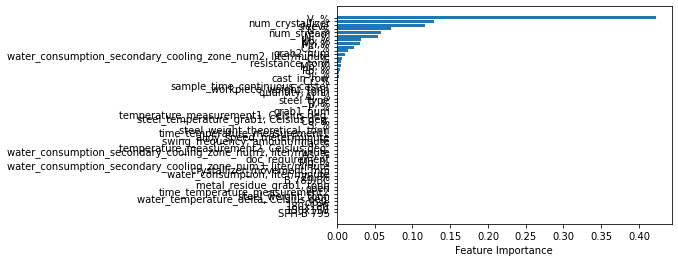

In [30]:
sort = xgb.feature_importances_.argsort()
plt.barh(X.columns[sort], xgb.feature_importances_[sort])
plt.xlabel("Feature Importance")
print(pd.DataFrame(xgb.feature_importances_[sort],X.columns[sort]))

In [31]:
# for i in tqdm(range(0, 100)):
#     shap_explainer = shap.TreeExplainer(gradientBoost)
#     shap_values = shap_explainer.shap_values(X)
#     shap.summary_plot(shap_values, X)

In [32]:
# corr_matrix = df.corr()
# columns = corr_matrix[corr_matrix>0.0001]
# columns['RUL']